In [131]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')



In [132]:

df = pd.read_csv("tips (data for regression problem).csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [133]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [134]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [135]:
df.dropna(inplace=True)

In [136]:
data = pd.get_dummies(df, drop_first=True)

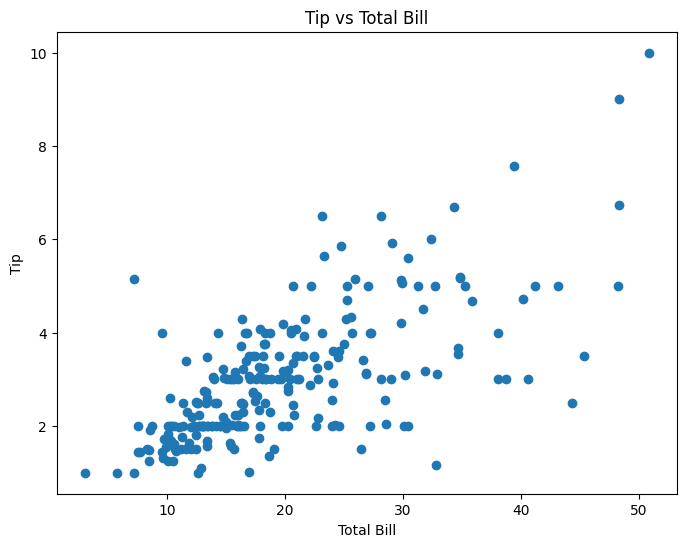

In [137]:
# Scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(data['total_bill'], data['tip'])
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


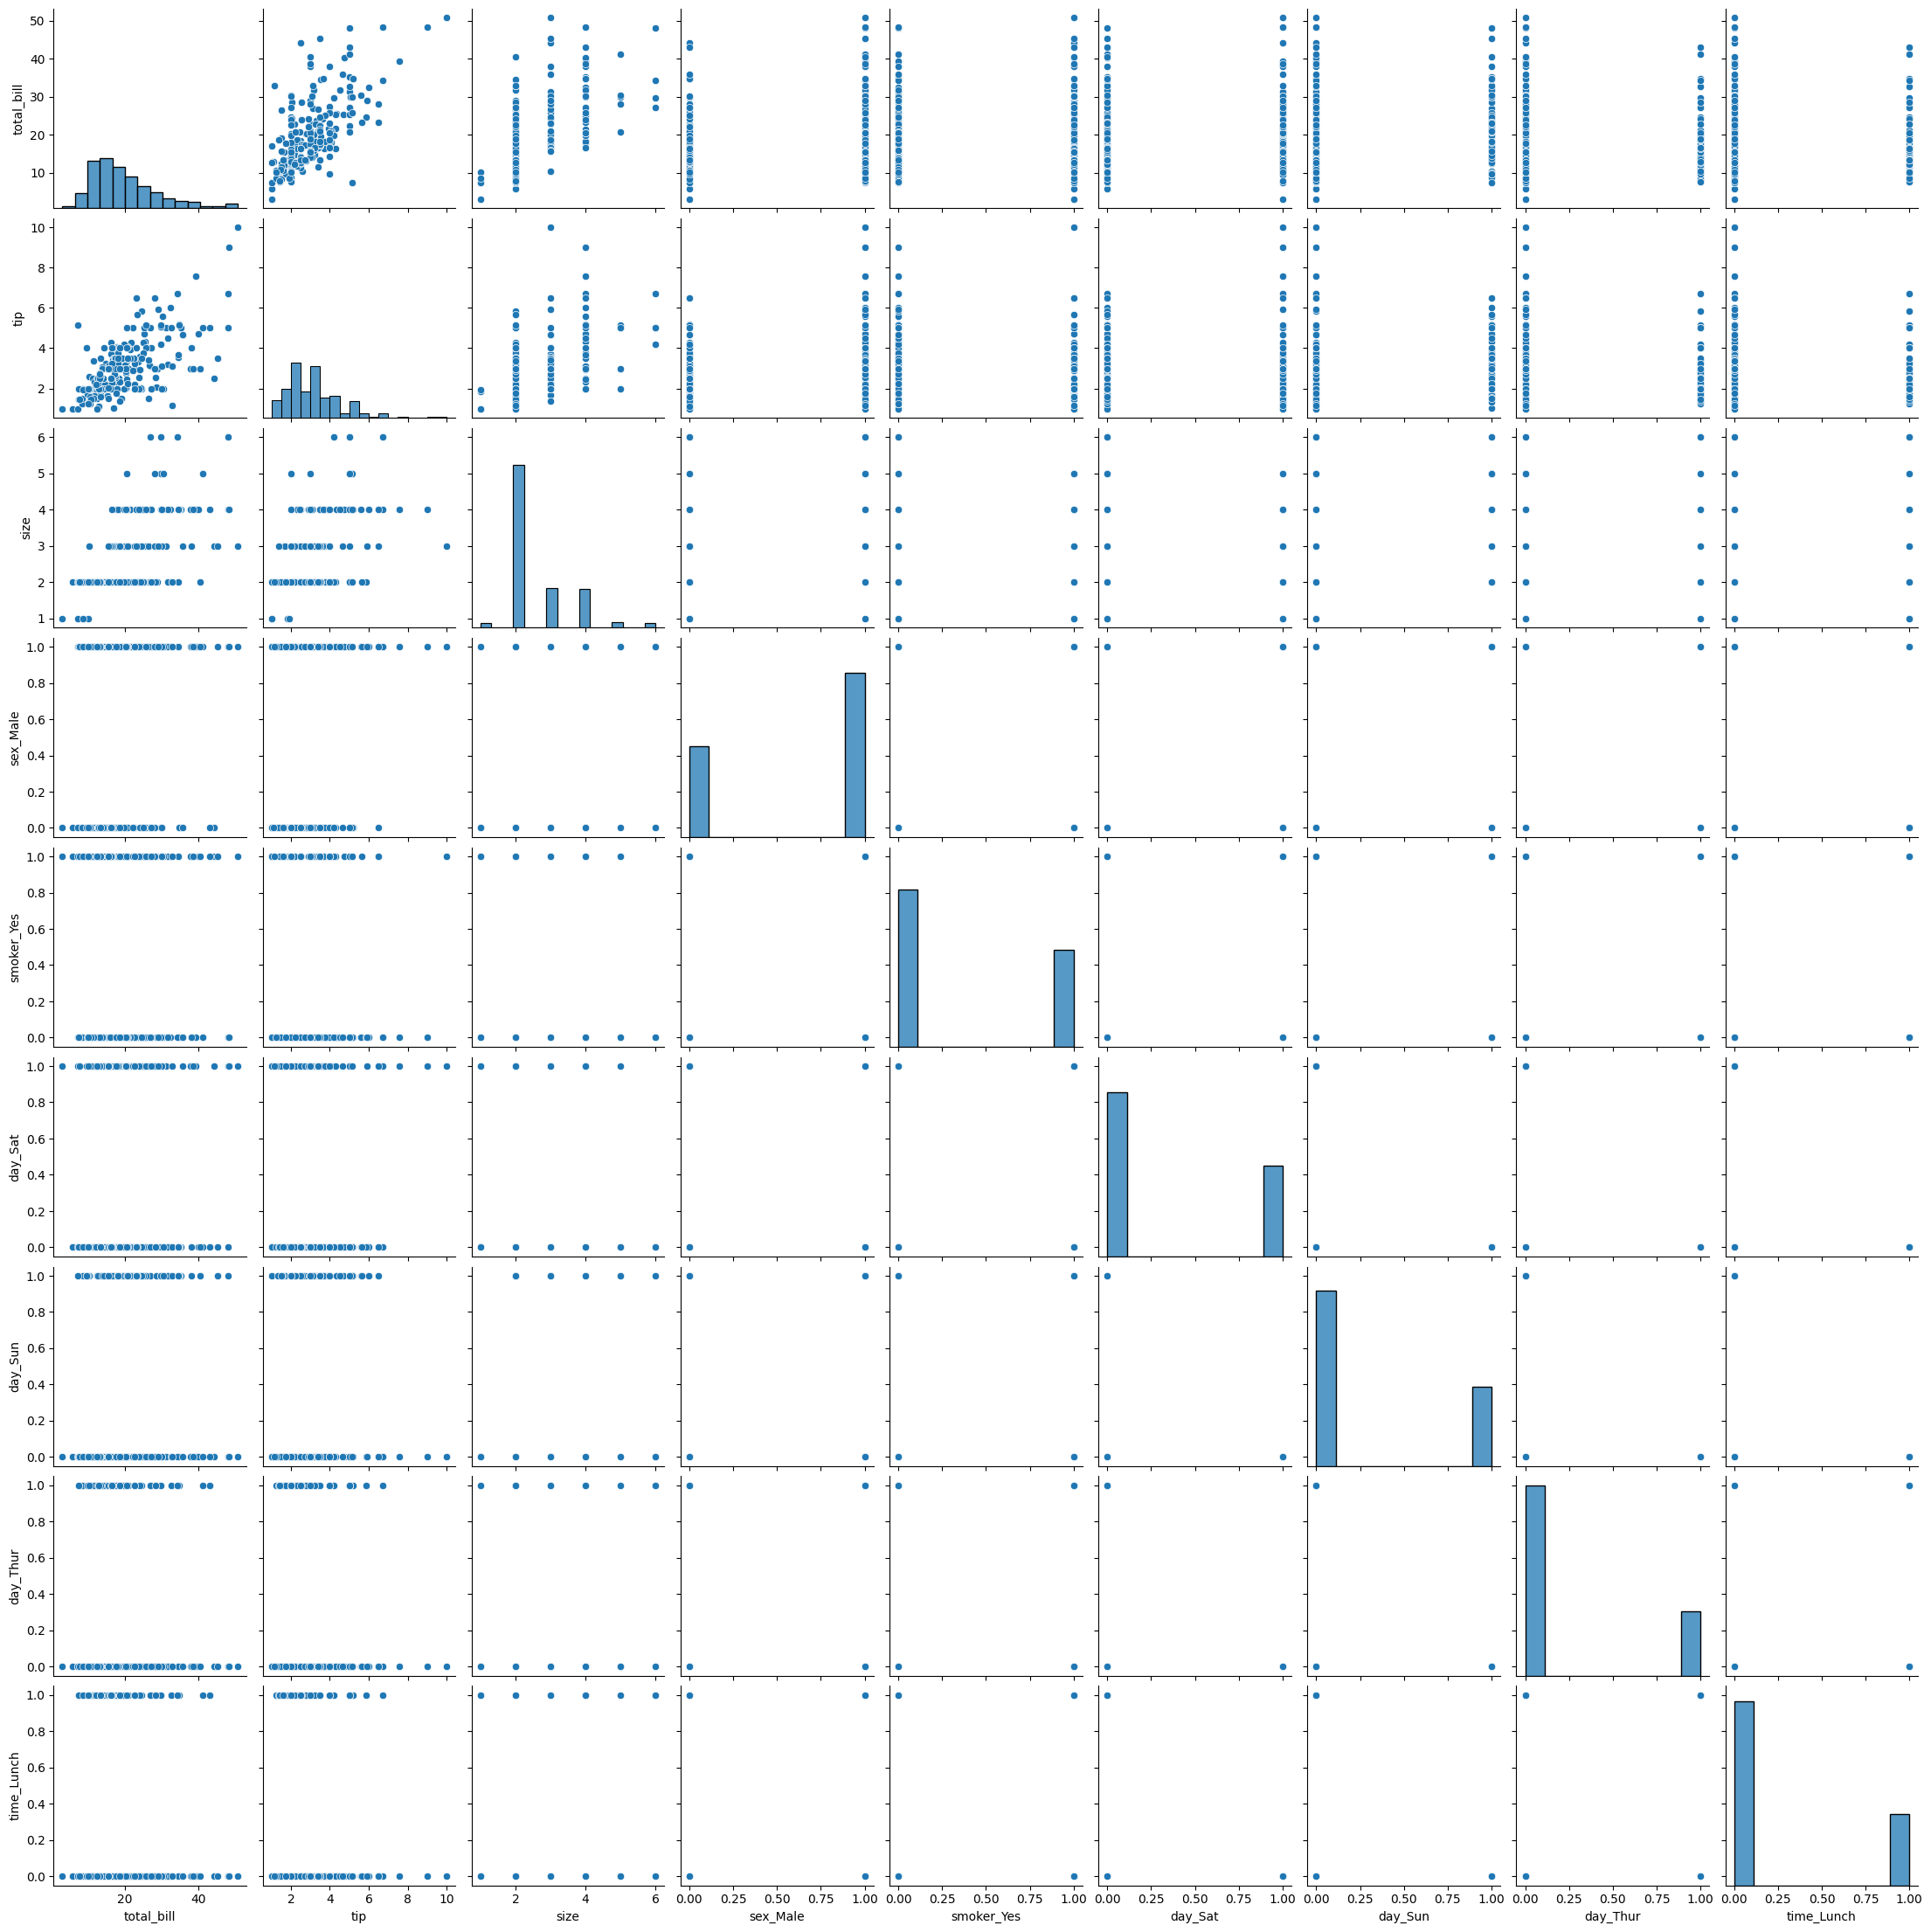

In [138]:
# Pair plot
sns.pairplot(data)
plt.show()


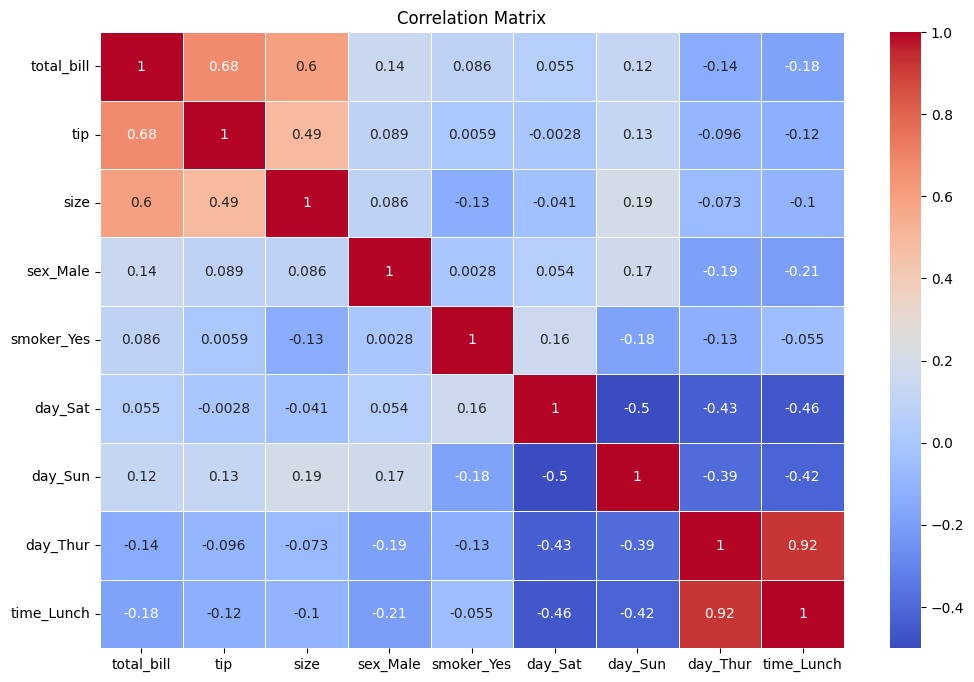

In [139]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Total bill highest impact to the tip amounts,then size also has a significant impact on tip amounts ,but rest has no sinificant impact on it.

In [140]:


# Define X (predictors) and y (target)
X = data.drop('tip', axis=1)
y = data['tip']

# Ensure all data is numeric and convert to float
X = X.astype(float)
y = y.astype(float)

# Add a constant to X for intercept
X = sm.add_constant(X)

# Perform the Rainbow test for linearity
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print("Rainbow test statistic:", rainbow_stat)
print("Rainbow test p-value:", rainbow_p_value)

# Interpretation of results
if rainbow_p_value < 0.05:
    print("The p-value is less than 0.05, suggesting a significant deviation from linearity.")
else:
    print("The p-value is greater than 0.05, suggesting no significant deviation from linearity.")


Rainbow test statistic: 1.1970545479945882
Rainbow test p-value: 0.16588383059241654
The p-value is greater than 0.05, suggesting no significant deviation from linearity.


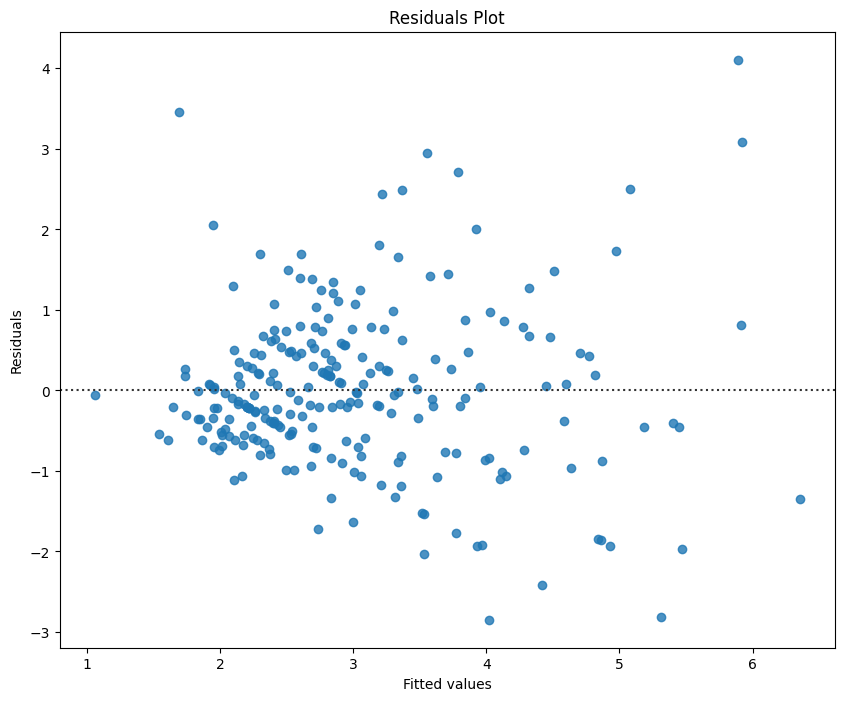

In [141]:
# Residuals plot for checking randomness
y_pred = model.predict(X)
residuals = y - y_pred
plt.figure(figsize=(10,8))
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [142]:
# splitting 
X = data.drop('tip', axis=1)
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation metrics
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression MAE: 0.6671331480264893
Linear Regression MSE: 0.7033566017436105
Linear Regression R2: 0.43730181943482505


In [144]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


Ridge Regression MAE: 0.6665379965588627
Ridge Regression MSE: 0.7007477213216073
Ridge Regression R2: 0.4393889716178486
Lasso Regression MAE: 0.6374841046500827
Lasso Regression MSE: 0.5908528649971524
Lasso Regression R2: 0.5273068720881755


In [145]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))


Decision Tree MAE: 0.8295918367346939
Decision Tree MSE: 1.2551938775510205
Decision Tree R2: -0.004178121600921791


In [146]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 0.7557163265306125
Random Forest MSE: 0.9196720148979602
Random Forest R2: 0.2642455218065466


In [147]:
# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR MAE:", mean_absolute_error(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R2:", r2_score(y_test, y_pred_svr))


SVR MAE: 0.5679864502285389
SVR MSE: 0.5323763062616395
SVR R2: 0.5740891915042663


In [148]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN R2:", r2_score(y_test, y_pred_knn))


KNN MAE: 0.718857142857143
KNN MSE: 0.8763725714285714
KNN R2: 0.29888587066985495


**Insights for management**

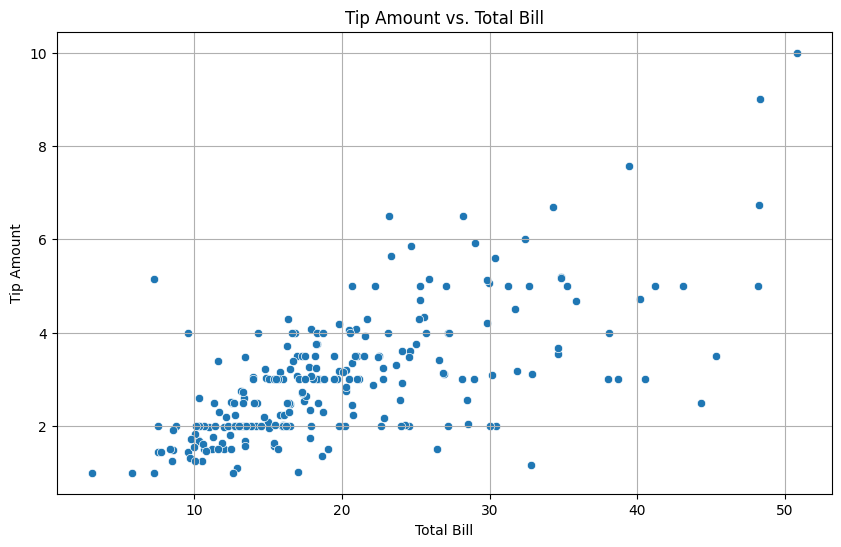

In [154]:
# Scatter plot to see the relationship between total bill and tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tip Amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()


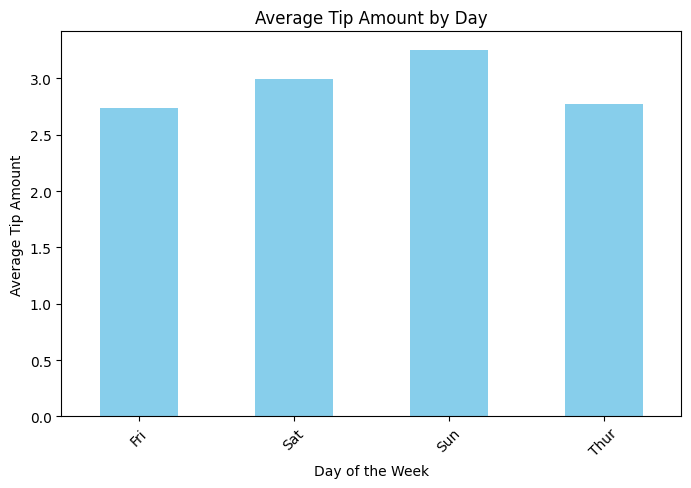

In [ ]:
# Calculate average tip per day
avg_tip_per_day = df.groupby('day')['tip'].mean().sort_index()

# Bar plot for average tip amount per day
plt.figure(figsize=(8, 5))
avg_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.show()


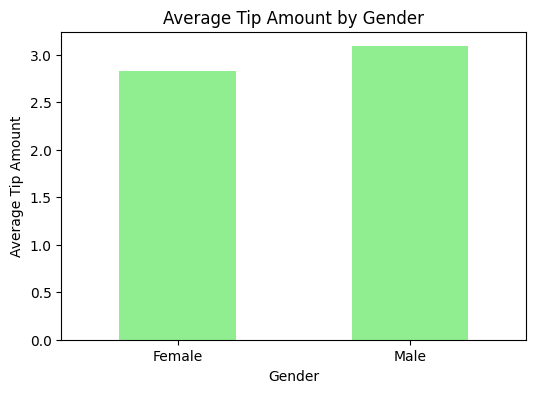

In [ ]:
# Average tip by gender
avg_tip_by_gender = df.groupby('sex')['tip'].mean()

# Bar plot for average tip amount by gender
plt.figure(figsize=(6, 4))
avg_tip_by_gender.plot(kind='bar', color='lightgreen')
plt.title('Average Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip Amount')
plt.show()


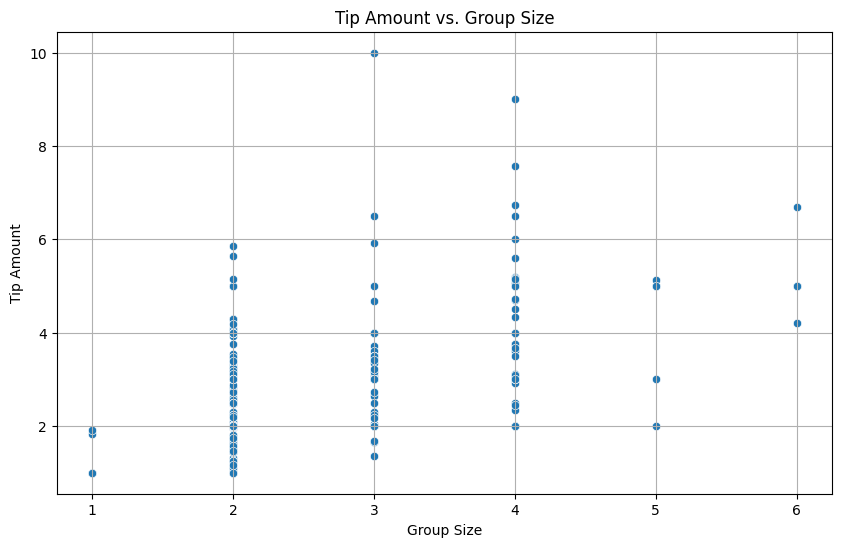

In [157]:
# Scatter plot for tip amount vs. group size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', data=df)
plt.title('Tip Amount vs. Group Size')
plt.xlabel('Group Size')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()


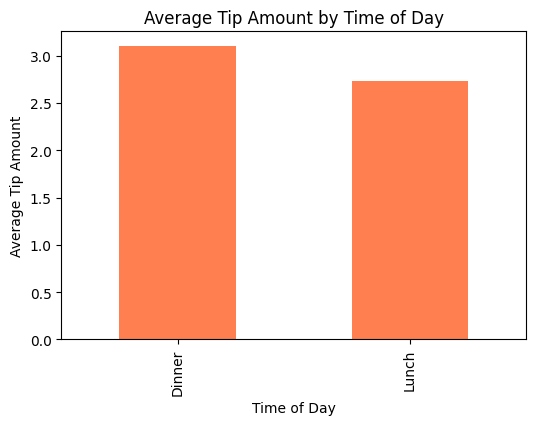

In [158]:
# Calculate average tip amount by time of day (lunch vs. dinner)
avg_tip_by_time = df.groupby('time')['tip'].mean()

# Bar plot for average tip amount by time of day
plt.figure(figsize=(6, 4))
avg_tip_by_time.plot(kind='bar', color='coral')
plt.title('Average Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.show()


CONCLUSION FOR INSIGHTS FOR MANAGEMENT
1.More no.of tips received from bill amount ranges from 20 to 40,so try to increase the products whose price is between this range.We get more tip amount on large bill so, Offer meal deals or upselling opportunities (like dessert or drinks) that could boost the total bill slightly, which may lead to higher tips.
2. During weekends, encourage group bookings or create special weekend menus that cater to groups. Additionally, assigning experienced staff on these days could enhance customer experience, potentially increasing tips.
3.Group size between 2 to 4 provide more no. of tips ,so inrease the group events in returant which has group size between 2 to 4.
4.In dinner,resturant get more tip amounts.So,try to decorate the resturant well and events like special dinner .To attract customers. 